# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, Data/wine.mat

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1 Load the data into Python using the scipy.io.loadmat() function. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. Plot new box plot and histogram for these attributes and compare them with initial ones.
 + *You can use the scipy.stats.zscore() to standardize your data before you plot a boxplot.*
 + *You can use the function matplotlib.pyplot.subplot() to plot several plots in one figure.*


(6497L, 12L)
(6L, 12L)
(147L, 12L)
(40L, 12L)
(6304L, 12L)


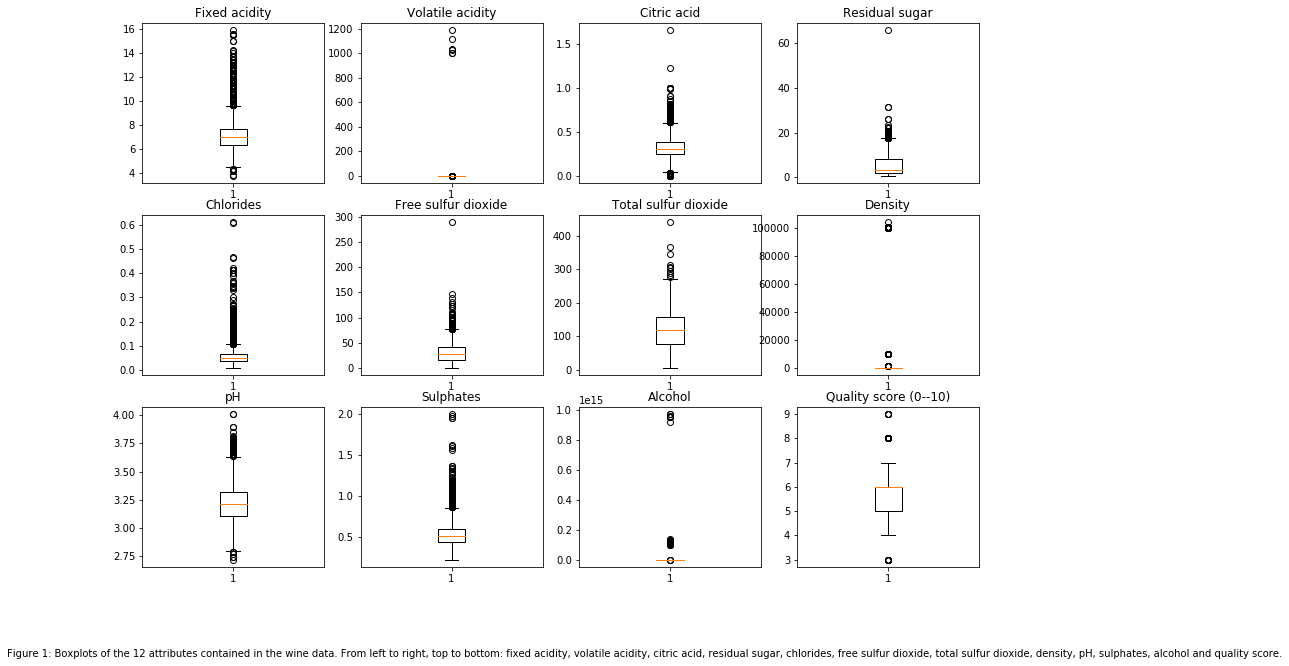

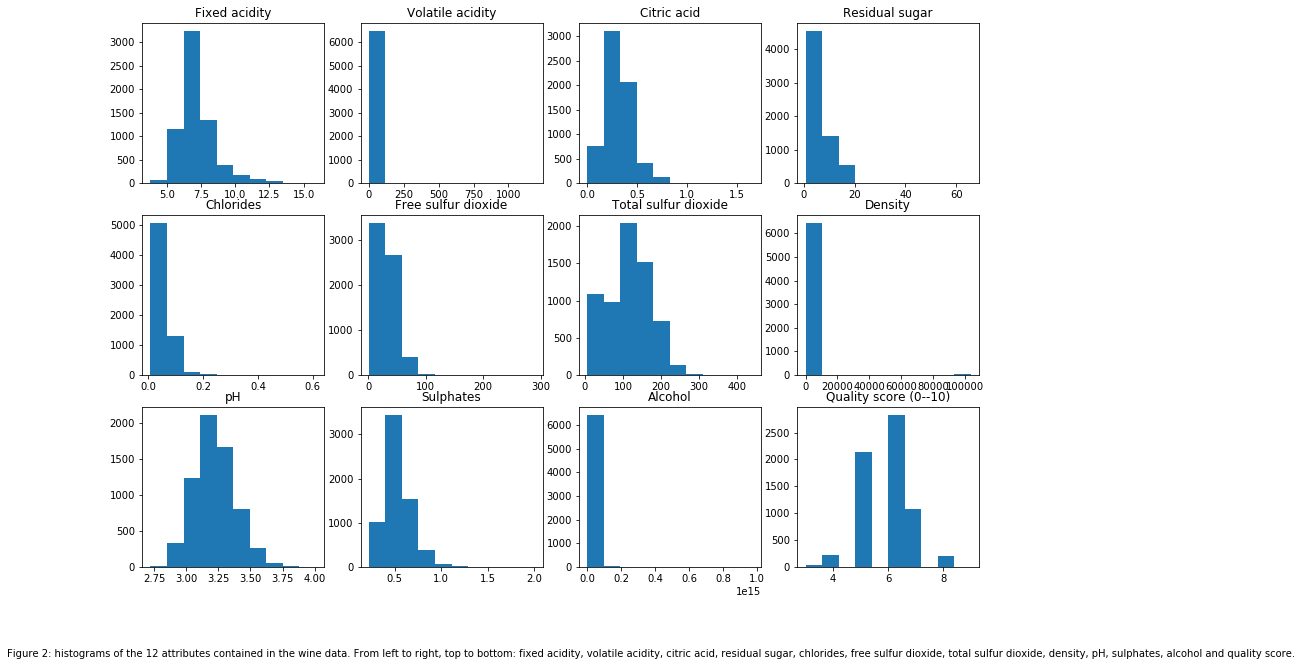

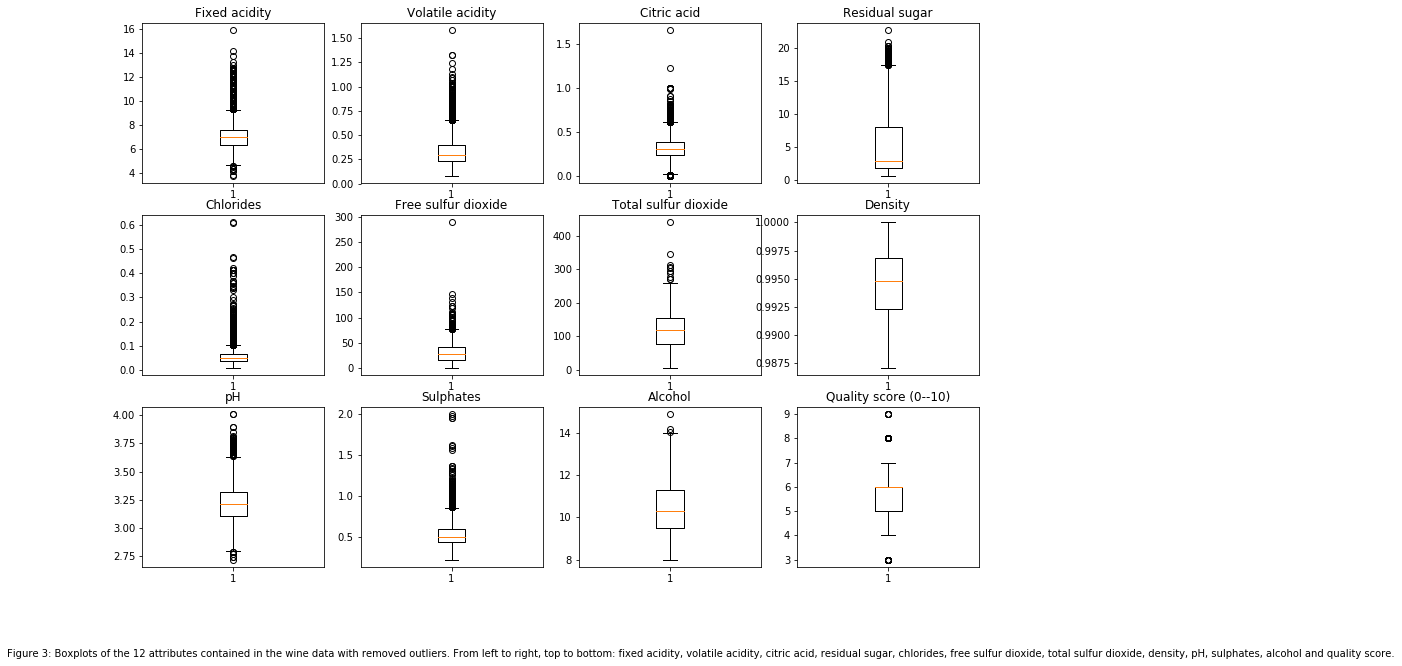

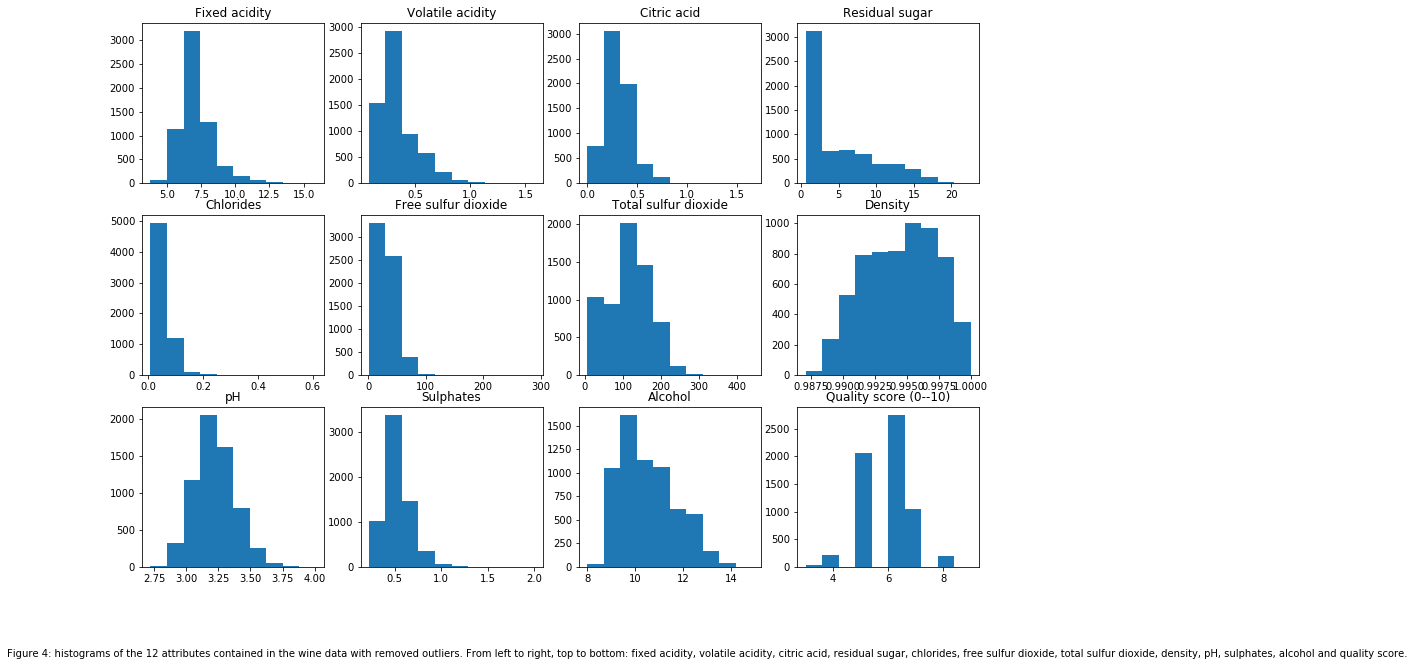

In [111]:
##Answer to question 2.1.1

#Import libraries
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Import data
WineData = loadmat('./Data/wine.mat')
WineAttributeNames = WineData['attributeNames']
WineX = WineData['X']

#Plot boxplots 
#Note that plotting the quality score is optional!
fig, axs = plt.subplots(3,4, figsize=(15,10))

axs = axs.ravel()

for i, name in enumerate(WineAttributeNames[0]):
    axs[i].boxplot(WineX[:,i])
    axs[i].set_title(name[0])

fig.text(0,0,'Figure 1: Boxplots of the 12 attributes contained in the wine data. From left to right, top to bottom: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol and quality score.')
fig.show()


#Plot histograms
#Note that plotting the quality score is optional!
fig, axs = plt.subplots(3,4, figsize=(15,10))

axs = axs.ravel()

for i, name in enumerate(WineAttributeNames[0]):
    axs[i].hist(WineX[:,i])
    axs[i].set_title(name[0])

fig.text(0,0,'Figure 2: histograms of the 12 attributes contained in the wine data. From left to right, top to bottom: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol and quality score.')
fig.show()

#Remove the outliers according to prior data.
print(WineX.shape)

#Check how many samples are removed
print((WineX[WineX[:,1]>20]).shape)
print((WineX[WineX[:,7]>10]).shape)
print((WineX[WineX[:,10]>100]).shape)

WineXNoOutlier = WineX[np.logical_not(np.logical_or(np.logical_or(WineX[:,1]>20,WineX[:,7]>10), WineX[:,10]>100 ))]
print(WineXNoOutlier.shape)

## Plots with removed outliers. (Note that only the Density, Volatile Acidity and Alcohol attribute plots -have- to be reproduced.)

#Plot boxplots 
#Note that plotting the quality score is optional!
fig, axs = plt.subplots(3,4, figsize=(15,10))

axs = axs.ravel()

for i, name in enumerate(WineAttributeNames[0]):
    axs[i].boxplot(WineXNoOutlier[:,i])
    axs[i].set_title(name[0])

fig.text(0,0,'Figure 3: Boxplots of the 12 attributes contained in the wine data with removed outliers. From left to right, top to bottom: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol and quality score.')
fig.show()


#Plot histograms
#Note that plotting the quality score is optional!
fig, axs = plt.subplots(3,4, figsize=(15,10))

axs = axs.ravel()

for i, name in enumerate(WineAttributeNames[0]):
    axs[i].hist(WineXNoOutlier[:,i])
    axs[i].set_title(name[0])

fig.text(0,0,'Figure 4: histograms of the 12 attributes contained in the wine data with removed outliers. From left to right, top to bottom: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol and quality score.')
fig.show()

Assignment of points:
11/12 box plots: 0.5
11/12 histogram plots: 0.5

Outlier removal procedure: 0.5

(at least) 3 box plots: 0.5
(at least) 3 histograms: 0.5

Elaboration: 0.5

Example elaboration:
Removal of the outliers according the the provided rules indeed improves the boxplots and histograms. The visible outliers in each have been removed, and the distribution can therefore be better studied.


Note that standardizing is not always needed. It is important that the boxplots are all within a visible range. this can also be accomplished by subplotting.

> 2.1.2 Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine?
+ *You can calculate the correlation coefficient using the scipy.stats.pearsonr() function to measure the strength of association.*

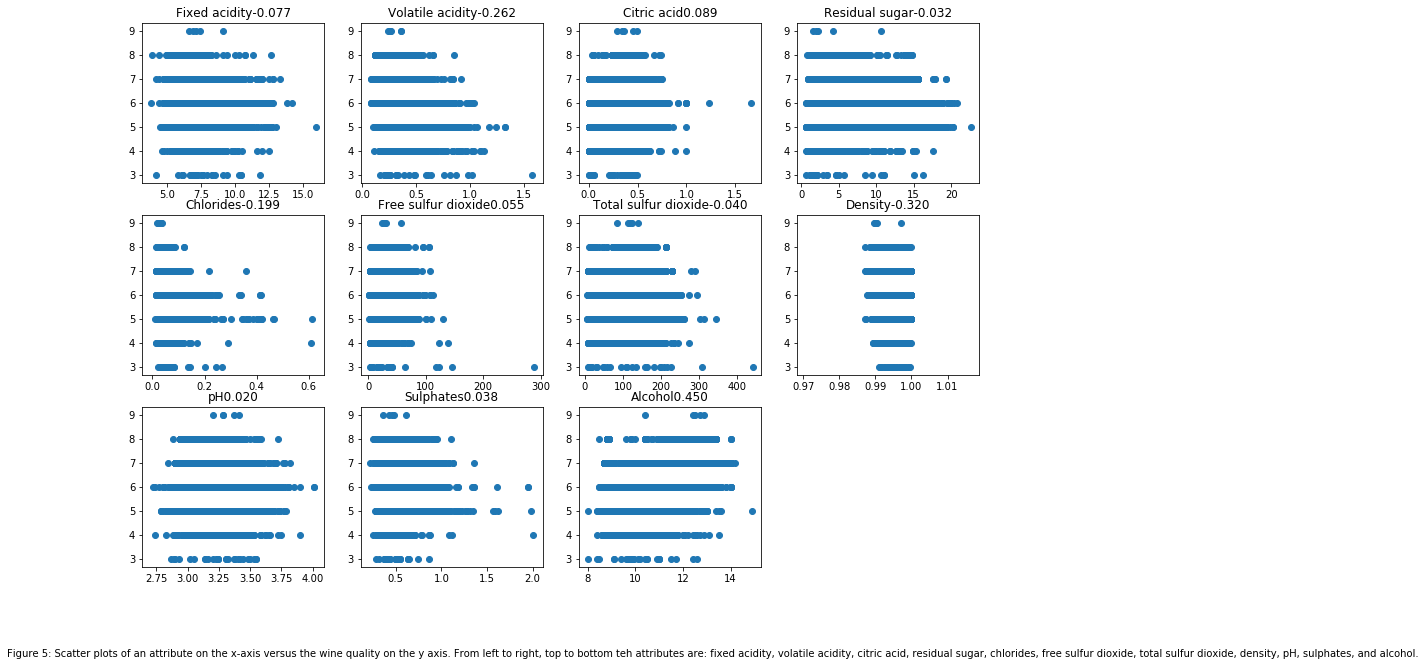

In [112]:
##Answer to question 2.1.2
from scipy.stats import pearsonr

fig, axs = plt.subplots(3,4, figsize=(15,10))

axs = axs.ravel()

for i, name in enumerate(WineAttributeNames[0]):
    axs[i].scatter(WineXNoOutlier[:,i], WineXNoOutlier[:,11])
    axs[i].set_title(name[0]+ "%.3f" % pearsonr(WineXNoOutlier[:,i], WineXNoOutlier[:,11])[0])
    
fig.text(0,0,'Figure 5: Scatter plots of an attribute on the x-axis versus the wine quality on the y axis. From left to right, top to bottom teh attributes are: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol.')
axs[11].set_visible(False) 

fig.show()

Because of the nature of scatter plots, it is hard to spot a clear relationship, as there is no overview of the density of the points. Nonetheless, using Pearson's r, we can conclude that there are a few noteworthy atributes which may be associated with high quality wine. (proper statistical testing would be needed.) These are in descending order:
Alcohol: 0.450
Density: -0.320
Volatile Acidity: -0.262
Chlorides: -0.199

Meaning a good wine generally has a higher alcohol content and lower density, volatile acidity and chlorides.

Points:
Plots: 0.5 points
Calculating pearsons r: 0.5 points
Providing a decent explanation 0.5 points

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. Visualize the first 10 digits as images. 
Next, compute the principal components (PCA) of the data matrix. Now,
using the PCA, create a new data matrix *Xpca*. The new data matrix should have 4 attributes corresponding to PC1-PC4. Reconstruct the initial data using PC1-PC4. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
Make a matrix of scatter plots of each combination of two principal components
for PC1-PC4 against each other. Make a 3-dimensional scatter plot of three
principal components PC1-PC3. Plot elements belonging to different classes in
different colors. Add a legend to clarify which digit is shown in which color.
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use * **Z** = **Y**\***V**[:,:4] to project the data onto the first four PCs.*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *


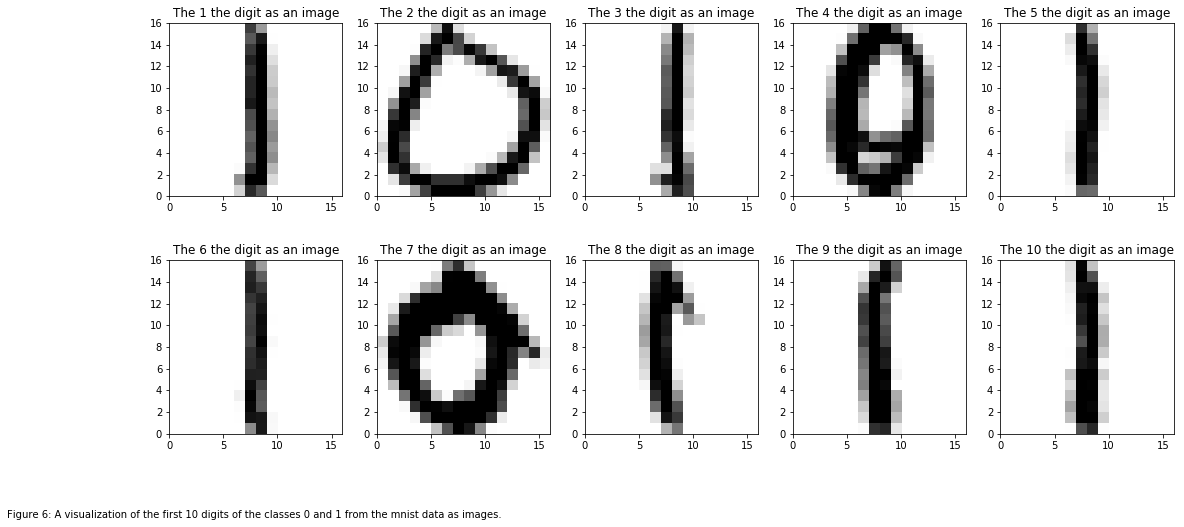

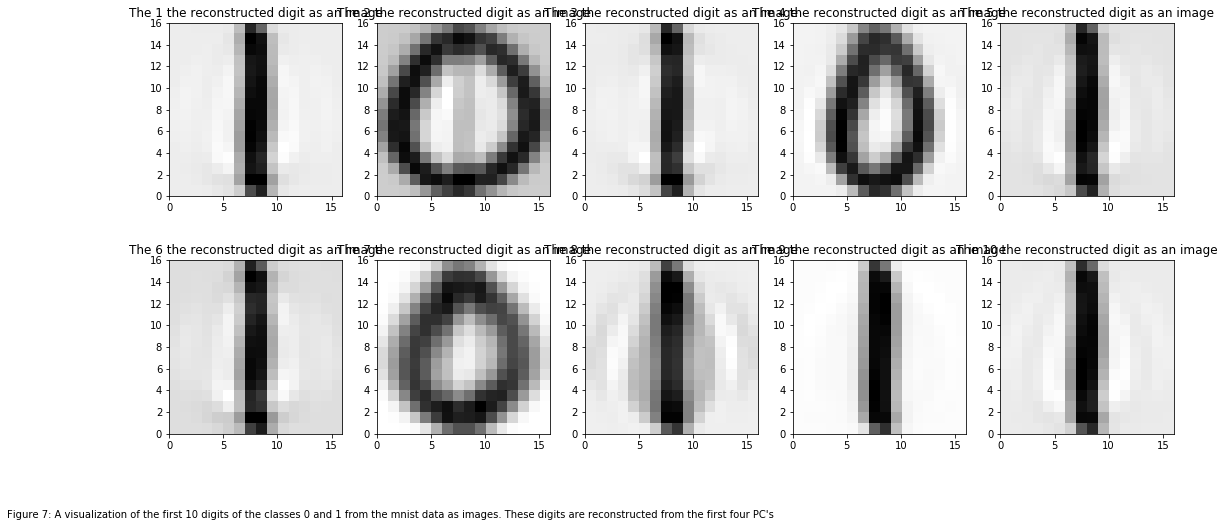

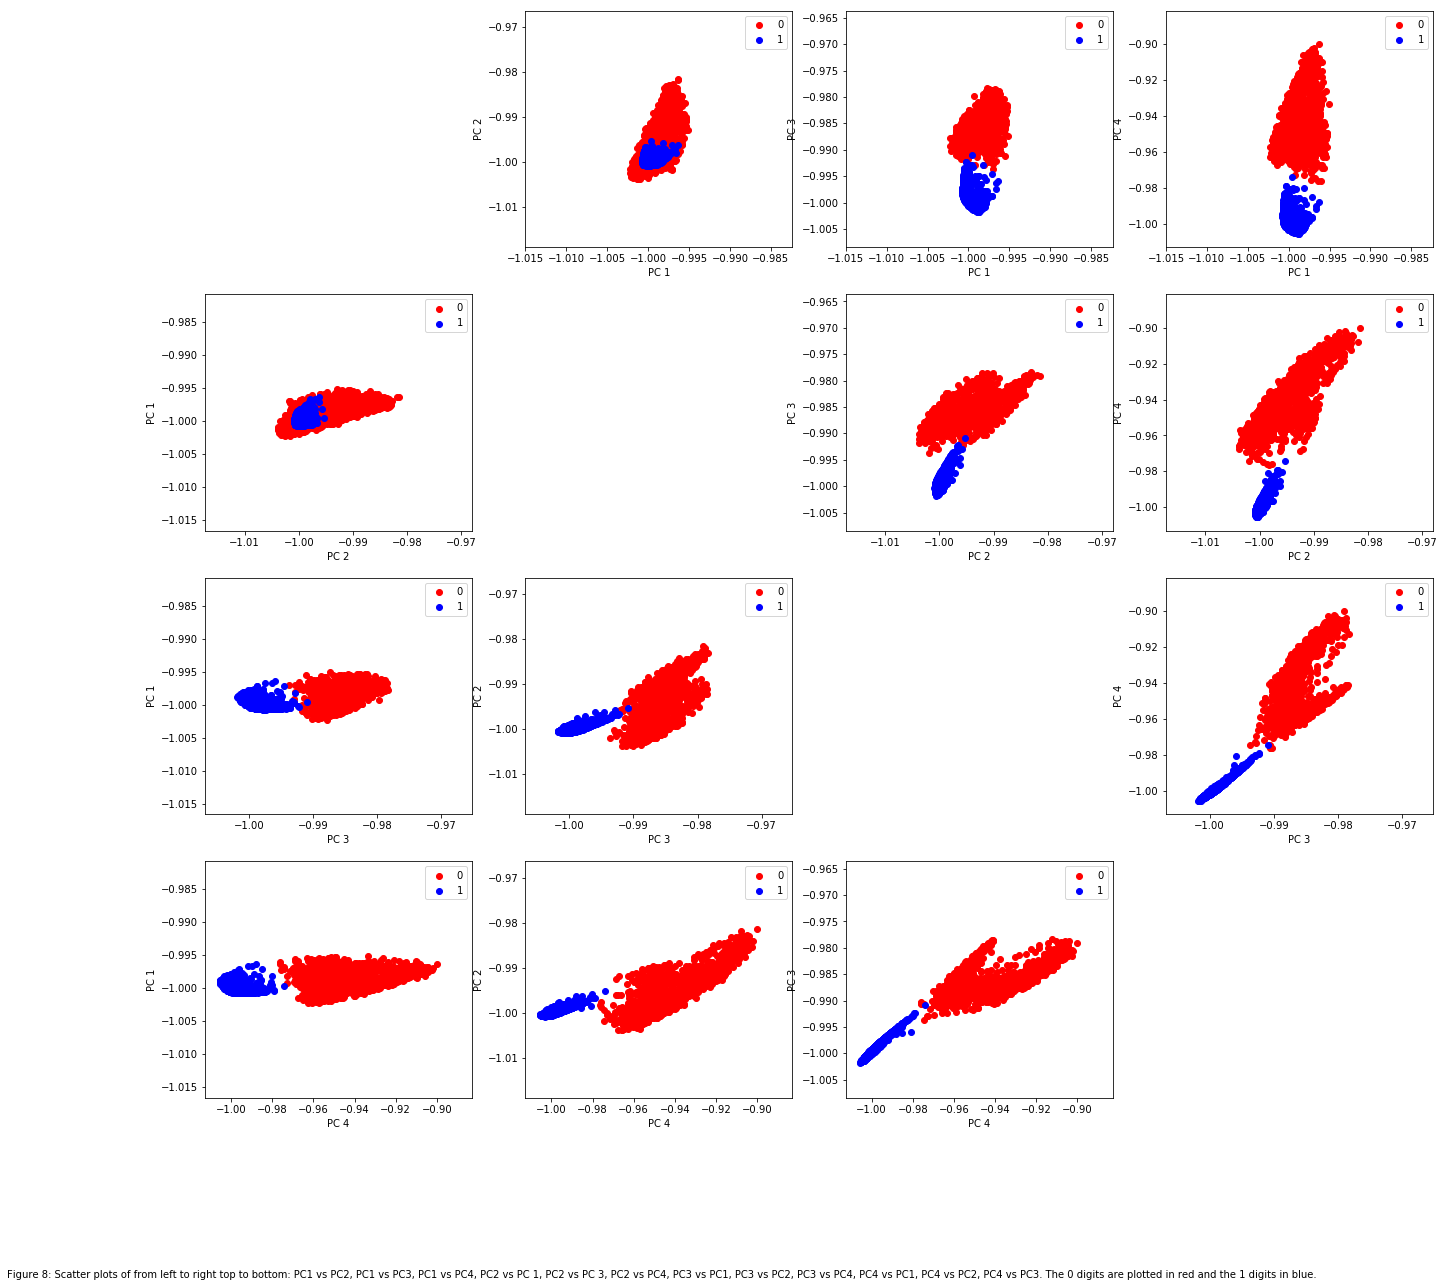

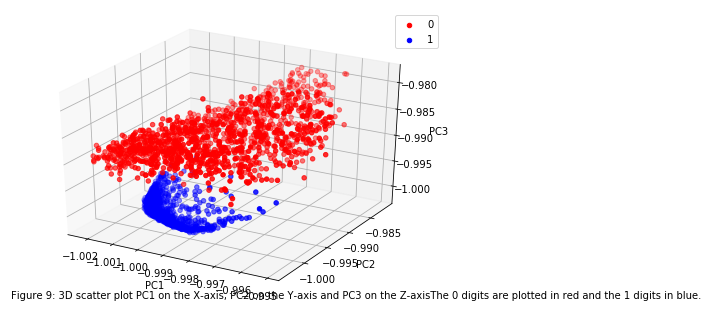

In [113]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape

#Load correct data

mat_data = loadmat('./Data/zipdata.mat')

testdata = mat_data['testdata']
traindata = mat_data['traindata']
X = traindata[:,1:]
y = traindata[:,0]

X01 = X[np.logical_or(y==0,y==1), :]
y01 = y[np.logical_or(y==0,y==1)]

#Plot initial digits

fig, axs = plt.subplots(2,5, figsize=(18,8))

axs = axs.ravel()

for i in range(10):
    axs[i].imshow(reshape(X01[i,:],(16,16)), extent=(0,16,0,16), cmap=cm.gray_r)
    axs[i].set_title("The %.f the digit as an image" %(i+1))
   
fig.text(0,0,'Figure 6: A visualization of the first 10 digits of the classes 0 and 1 from the mnist data as images.')
fig.show()

# reconstruct data from 4 PC's

Y = X01 - X01.mean(axis=0).reshape(1,-1)

[U, S, Vt] = np.linalg.svd(Y)

V = Vt.transpose()
Z = np.dot(Y, V[:,:4])

Xpca = np.dot(Z,Vt[:4,:]) + X01.mean(axis=0).reshape(1,-1)

# plot reconstructed digits
fig, axs = plt.subplots(2,5, figsize=(18,8))

axs = axs.ravel()

for i in range(10):
    axs[i].imshow(reshape(Xpca[i,:],(16,16)), extent=(0,16,0,16), cmap=cm.gray_r)
    axs[i].set_title("The %.f the reconstructed digit as an image" %(i+1))
   
fig.text(0,0,'Figure 7: A visualization of the first 10 digits of the classes 0 and 1 from the mnist data as images. These digits are reconstructed from the first four PC\'s')
fig.show()

# plot 2D scatter plots
fig, axs = plt.subplots(4,4, figsize=(22,20))

for i in range(4):
    for j in range(4):
        if i==j:
            axs[i,j].set_visible(False) 
        else:
            axs[i,j].scatter(Xpca[y01==0,i], Xpca[y01==0,j], c='red', label='0')
            axs[i,j].scatter(Xpca[y01==1,i], Xpca[y01==1,j], c='blue', label='1')
            axs[i,j].set_xlabel('PC %.i' % (i+1))
            axs[i,j].set_ylabel('PC %.i' % (j+1))
            axs[i,j].legend()
            
fig.text(0,0,'Figure 8: Scatter plots of from left to right top to bottom: PC1 vs PC2, PC1 vs PC3, PC1 vs PC4, PC2 vs PC 1, PC2 vs PC 3, PC2 vs PC4, PC3 vs PC1, PC3 vs PC2, PC3 vs PC4, PC4 vs PC1, PC4 vs PC2, PC4 vs PC3. The 0 digits are plotted in red and the 1 digits in blue.')
fig.show()

# plot 3D scatter plot.

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Xpca[y01==0,0], Xpca[y01==0,1], Xpca[y01==0,2], c='red', label='0')
ax.scatter(Xpca[y01==1,0], Xpca[y01==1,1], Xpca[y01==1,2], c='blue', label='1')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()

fig.text(0,0,'Figure 9: 3D scatter plot PC1 on the X-axis, PC2 on the Y-axis and PC3 on the Z-axisThe 0 digits are plotted in red and the 1 digits in blue.')
fig.show()

The reconstructed images contain far less noise. You can better see that each of them resembles their original class. Many of the small differences between the numbers have been exempted by just using four PC's.

From the 2D scatter plots we can conclude that PC1 and PC2 in combination do not separate the two classes very well, as they overlap. Every other combination is able to decently separate the two classes.

Using 3 PC's we can see that we get a near perfect separation of the two classes.

Points:
Plot digits: 0.5
Reconstruct digits: 0.5
plot reconstructed digits: 0.5
Observation reconstructed digits: 0.5

plot 2D scatter plots: 0.5
observation 2d scatter plots: 0.5
plot 3D scatter plot: 0.5
observation 3d scatter plots: 0.5




## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [114]:
##Answer to question 2.3.1 (0.3 points)
appendages = np.array([2,3,6,8,11,18])
m = appendages.mean()
sigma = appendages.std()

print('m=%.3f' %m)
print('sigma=%.3f' %sigma)

m=8.000
sigma=5.385


> ii. List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [115]:
##Answer to question 2.3.2 (0.3 points)
from itertools import combinations

print('combinations for taking 2 elements:')
c2 = combinations(appendages,2)

c2_means=[]
for c in c2:
    c2_means.append(np.mean(c))
    print('combination: {}, mean: {}'.format(c, c2_means[-1]))
c2_means=np.array(c2_means)
    
print('combinations for taking 4 elements:')
c4 = combinations(appendages,4)

c4_means=[]
for c in c4:
    c4_means.append(np.mean(c))
    print('combination: {}, mean: {}'.format(c, c4_means[-1]))
c4_means=np.array(c4_means)

combinations for taking 2 elements:
combination: (2, 3), mean: 2.5
combination: (2, 6), mean: 4.0
combination: (2, 8), mean: 5.0
combination: (2, 11), mean: 6.5
combination: (2, 18), mean: 10.0
combination: (3, 6), mean: 4.5
combination: (3, 8), mean: 5.5
combination: (3, 11), mean: 7.0
combination: (3, 18), mean: 10.5
combination: (6, 8), mean: 7.0
combination: (6, 11), mean: 8.5
combination: (6, 18), mean: 12.0
combination: (8, 11), mean: 9.5
combination: (8, 18), mean: 13.0
combination: (11, 18), mean: 14.5
combinations for taking 4 elements:
combination: (2, 3, 6, 8), mean: 4.75
combination: (2, 3, 6, 11), mean: 5.5
combination: (2, 3, 6, 18), mean: 7.25
combination: (2, 3, 8, 11), mean: 6.0
combination: (2, 3, 8, 18), mean: 7.75
combination: (2, 3, 11, 18), mean: 8.5
combination: (2, 6, 8, 11), mean: 6.75
combination: (2, 6, 8, 18), mean: 8.5
combination: (2, 6, 11, 18), mean: 9.25
combination: (2, 8, 11, 18), mean: 9.75
combination: (3, 6, 8, 11), mean: 7.0
combination: (3, 6, 8,

> iii. Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [116]:
##Answer to question 2.3.3 (0.3 points)
m2 = np.mean(c2_means)
print('m2 = {}'.format(m2))
sigma2 = np.std(c2_means)
print('sigma2 = {}'.format(sigma2))

m4 = np.mean(c4_means)
print('m4 = {}'.format(m4))
sigma4 = np.std(c4_means)
print('sigma4 = {}'.format(sigma4))

m2 = 8.0
sigma2 = 3.40587727319
m4 = 8.0
sigma4 = 1.70293863659


> iv. Verify the Central Limit Theorem: (i) compare the population
mean with the mean of both sample means; (ii) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

i: (0.1) The sample means are of course the same as the population mean.
ii: (0.2)
For N = 2:  The standard deviation of the sample means is 3.5254
            The population standard deviation divided by the square root of 2 is 4.1713
            The standard deviation better approximation is 3.7310
For N = 4:  The standard deviation of the sample means is 1.7627
            The population standard deviation divided by the square root of 2 is 2.9496
            The standard deviation better approximation is 1.8655
            
thus the low population approximation gives a pretty decent estimate of the sample standard deviation.

> v. Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

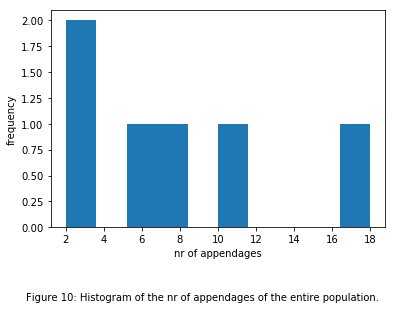

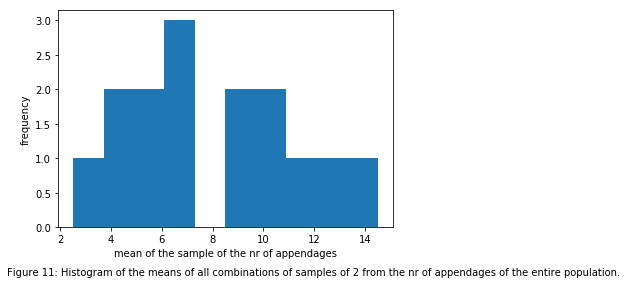

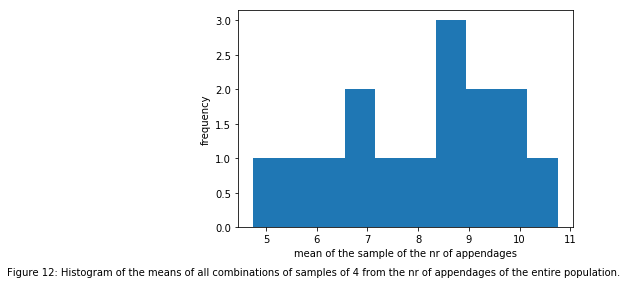

In [117]:
##Answer to question 2.3.5 (0.2 for plot, 0.1 for explanation)


plt.hist(appendages)
plt.text(-0.1,-0.7,'Figure 10: Histogram of the nr of appendages of the entire population.')
plt.ylabel('frequency')
plt.xlabel('nr of appendages')
plt.show()

plt.hist(c2_means)
plt.text(-0.1,-0.7,'Figure 11: Histogram of the means of all combinations of samples of 2 from the nr of appendages of the entire population.')
plt.ylabel('frequency')
plt.xlabel('mean of the sample of the nr of appendages')
plt.show()

plt.hist(c4_means)
plt.text(-0.1,-0.7,'Figure 12: Histogram of the means of all combinations of samples of 4 from the nr of appendages of the entire population.')
plt.ylabel('frequency')
plt.xlabel('mean of the sample of the nr of appendages')
plt.show()

As the sample size increase, the standard deviation becomes increasingly small. The distribution thus narrows, and this verifies the central limit theorem.